In [2]:
import pandas as pd
import sys
import os
sys.path.append('../tools')
import emotions as tem
import sqlalchemy as alch

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/sinatxe/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [3]:
import string
import spacy
import en_core_web_sm
from nltk.corpus import stopwords
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
#config visualization
%matplotlib inline
%config Inlinebackend.figure_format= 'retina'
sns.set_context("poster")
sns.set(rc={"figure.figsize": (10.,7.)})
sns.set_style("whitegrid")

## Sentiment Analysis of our database by character

In [4]:
muestra_sent = pd.read_csv("../data/muestra.csv")

In [6]:
muestra_sent["tokening"] = muestra_sent.quote.apply(tem.tokenizando)

In [ ]:
muestra_sent.tokening.fillna(" ",inplace = True)

In [ ]:
muestra_sent["emotions"] = muestra_sent.tokening.apply(tem.sentimental)

In [ ]:
muestra_sent[["polaridad","subjetividad","neg","neu","pos","compound"]] = pd.DataFrame(muestra_sent.emotions.tolist(),index= muestra_sent.index)

In [ ]:
muestra_sent.to_csv("../data/muestra_sent.csv",index = False)

In [6]:
medias_sent = muestra_sent.groupby("character").agg({"polaridad":"mean","subjetividad":"mean","neg":"mean","neu":"mean","pos":"mean","compound":"mean"}).reset_index().sort_values("compound")

In [7]:
medias_sent

,character,polaridad,subjetividad,neg,neu,pos,compound
5,Ross,0.050809,0.290568,0.117491,0.636473,0.197558,0.087426
2,Monica,0.068476,0.262884,0.077800,0.601963,0.246547,0.107398
0,Chandler,0.087634,0.317637,0.082937,0.621176,0.245541,0.143482
1,Joey,0.073719,0.265077,0.074172,0.594262,0.283290,0.151501
3,Phoebe,0.097150,0.278344,0.079399,0.596758,0.265033,0.165449
4,Rachel,0.107709,0.268393,0.058537,0.567766,0.288585,0.195117


## Subjectivity

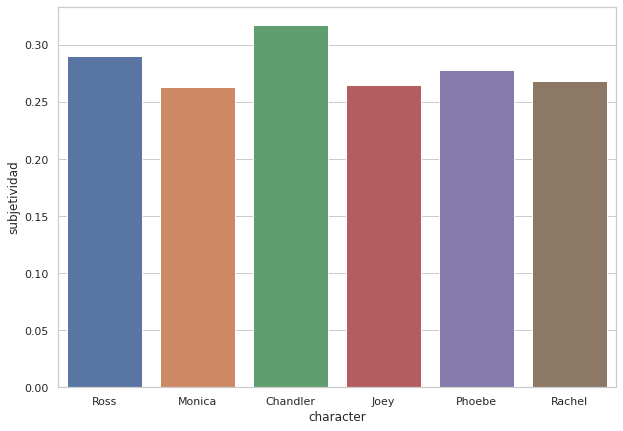

In [8]:
sns.barplot(y=medias_sent.subjetividad,x = medias_sent.character );

![](https://c.tenor.com/hR2WhciBI3YAAAAC/chandler-friends.gif)

## Sadness
- zero = sad / 1 = happy

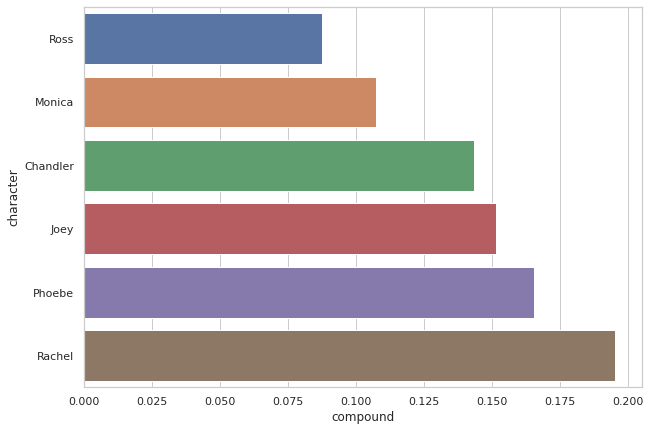

In [9]:
sns.barplot(x=medias_sent.compound,y = medias_sent.character);

![](https://media0.giphy.com/media/KN5JIUb3LO6Ws/giphy.gif)